# Introduction

Machine Learning (ML) is the study of computer programs called algorithms that can learn from experience

## Components of a machine learning system

1. Data
2. Model that helps us transform data
3. Objective function that evaluates and quantifies how well or badly the outcome does
4. Algorithm to adjust the model's parameters to optimize the objective function

## Typical machine learning tasks
Some of the typical machine learning tasks include classification or categorization, regression, anomaly detection, structured annotation, translation, clustering or grouping, and transcription

## Types of Machine Learning
Machine learning has several algorithms, methodologies and techniques for solving problems. Broad categories and bases are below
- Based on human supervision and involvement
    1. Supervised learning: classification, regression
    2. Unsupervised learning: clustering, dimensionality reduction, anomaly detection, association-rule mining
    3. Semi-supervised learning
    4. Reinforcement learning

- Based on ability to learn from incremental data samples
    1. Batch learning
    2. Online learning

- Based on approach to generalization from data samples
1. Instance-based learning
2. Model-based learning

## Data Mining process
Standard processes required in machine learning includes the following
- Business understanding
- Data understanding
- Data preparation
- Modelling
- Evaluation
- Deployment

## Machine Learning Pipelines
These are isolated processes that provide a kind of road map to the final solution. It is mainly concerned about the general technical processes of data retrieval from datasets, extraction, preparation, modelling, evaluation and deployment, which are actually part of the data mining processes as follows
- Data retrieval
- Data preparation
    1. Data processing and wrangling
    2. Feature extraction and engineering
    3. Feature scaling and selection
- Modelling
- Model evaluation and tunning
- Deployment and monitoring

## Terminologies and Notations

## Roadmaps for building machine learning systems


In [ ]:
msg = "Hello World!"
print(msg)

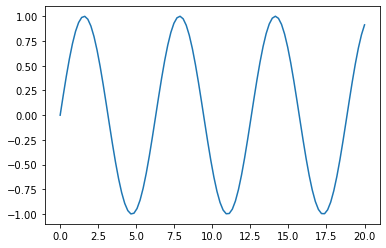

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,20,100)
plt.plot(x, np.sin(x))
plt.show()

In [3]:
# path to datafiles
import os
datapath = os.path.join("../../xdata/ml/hands-on", "lifesat", "")


In [5]:
# Prepare country stats
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] =="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    remove_indices = [0, 1, 6, 8, 33, 32, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

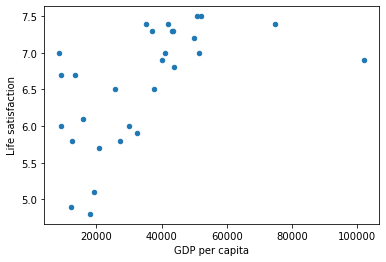

In [6]:
# Code example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t', 
        encoding='latin1', na_values="n/a")

# Prepare data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()


In [7]:
# Load and prepare life satisfaction data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [8]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      6.9
Belgium      6.9
Brazil       7.0
Canada       7.3
Name: Life satisfaction, dtype: float64

In [9]:
# Load and prepare GDP per capita data
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
